#### IMPORT PYTHON LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

#### IMPORTING CSV FILE

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### CHECKING NULL VALUES SUM

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### DROPPING IRRELEVANT COLUMNS

In [6]:
df.drop(columns = ['id','imdb_id','homepage','cast','tagline','overview','budget_adj'], inplace=True)

#### Dropna values  where either the 'genres' or 'director' column has missing values

In [7]:
df.dropna(how='any',subset=['genres','director'],inplace=True)

#### Filling missing value with 0

In [8]:
df['production_companies'] = df['production_companies'].fillna(0)
df['keywords'] = df['keywords'].fillna(0)

In [9]:
df['popularity'] = df['popularity'].round(2)

#### Calculates the profit by subtracting the 'budget' from the 'revenue'  and inserts at 3

In [10]:
df.insert(3,'profit',df['revenue'] - df['budget'])

#### Calculate the roi by dividing the 'profit' and 'budget' and insert at 4

In [11]:
df.insert(4,'roi',df.profit/df.budget)

#### Count of unique values in the 'roi' column of DataFrame 'df

In [12]:
df.roi.value_counts()

roi
-1.000000    1311
 inf          995
 1.000000       5
 0.000000       4
 3.000000       4
             ... 
-0.691508       1
-0.528361       1
-0.295646       1
 8.941651       1
 1.346041       1
Name: count, Length: 3818, dtype: int64

#### Creates a boolean mask identifying non-finite values or NaN in the 'roi' column 

In [13]:
non_finite_values = ~np.isfinite(df['roi'])

In [14]:
non_finite_values.sum()

5636

#### Replaces infinite values (positive and negative) in the 'roi' with NaN

In [15]:
df['roi'] = df['roi'].replace([np.inf,-np.inf],np.nan)

In [16]:
df['roi'] = df['roi'].round(2)

#### Creating new dataframe df1

In [17]:
df1 = df[['popularity','budget','revenue','profit','roi','vote_count','vote_average','release_year']]

In [18]:
df1.isnull().sum()

popularity         0
budget             0
revenue            0
profit             0
roi             5636
vote_count         0
vote_average       0
release_year       0
dtype: int64

#### Histogram for  df1 with 20 bins figsize of 14x12.

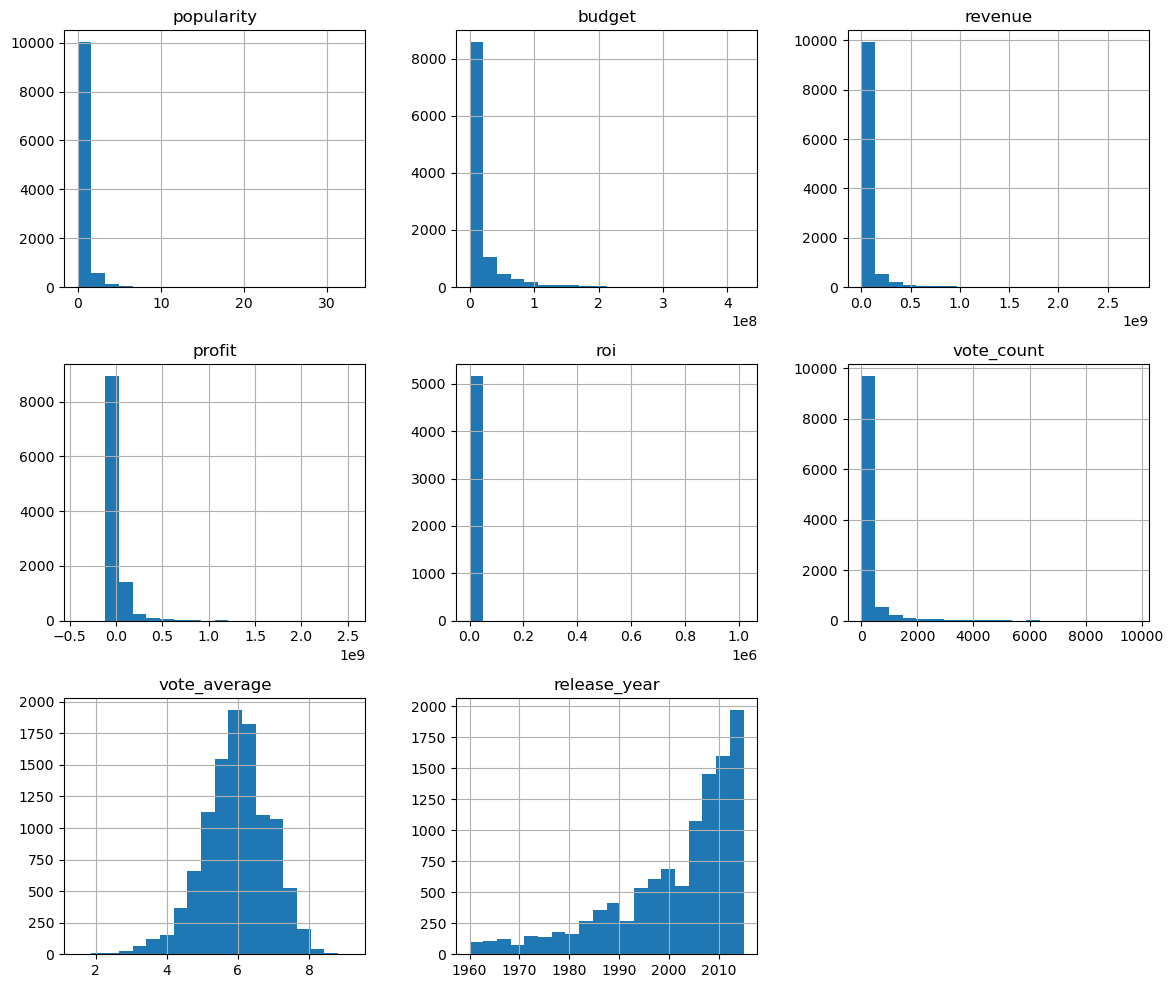

In [19]:
df1.hist(bins=20,figsize=(14,12))
plt.show()

In [20]:
df.popularity.value_counts()

popularity
0.14    193
0.28    190
0.21    186
0.25    182
0.20    179
       ... 
5.81      1
5.08      1
3.83      1
3.74      1
2.68      1
Name: count, Length: 483, dtype: int64

In [21]:
df.head(2)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08


In [22]:
df2 = df.groupby('release_year')['roi'].sum()

# Visualising data with line, bar graph and pie chart

#### Calculate mean roi for release year then plots it as line graph 

<Axes: xlabel='release_year'>

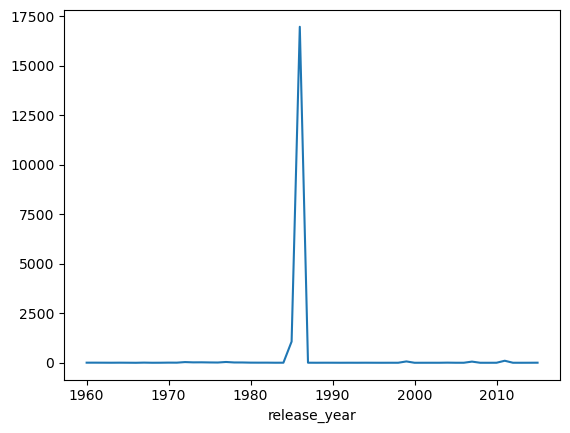

In [23]:
df2 = df.groupby('release_year')['roi'].mean()
df2.plot(kind='line')

Text(0, 0.5, 'Popularity')

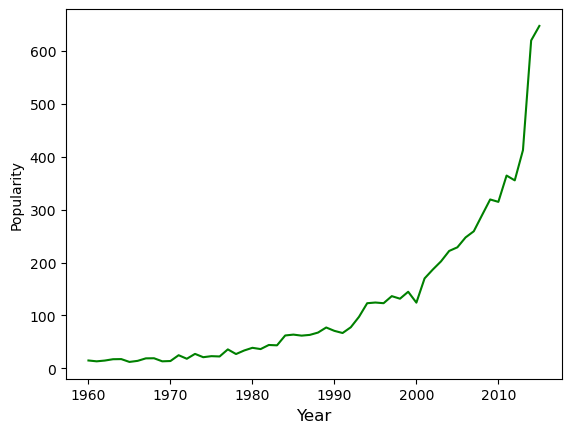

In [24]:
# line plot showing total popularity per year

df3 = df.groupby('release_year')['popularity'].sum()
df3.plot(kind='line', color='green')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Popularity')

Text(0, 0.5, 'Rating')

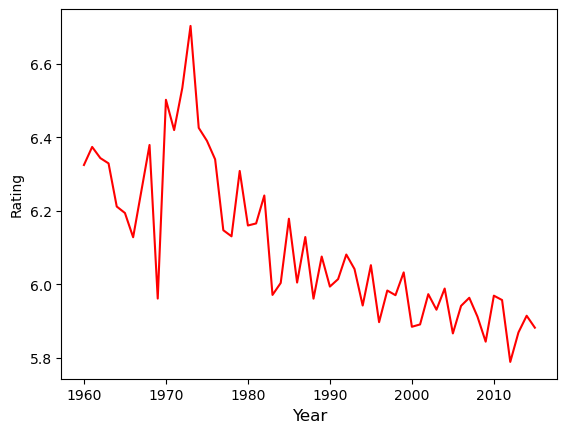

In [25]:
# line plot showing vote average per year

df4 = df.groupby('release_year')['vote_average'].mean()
df4.plot(kind='line', color='red')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rating')

Text(0.5, 1.0, 'Popularity vs Vote Average')

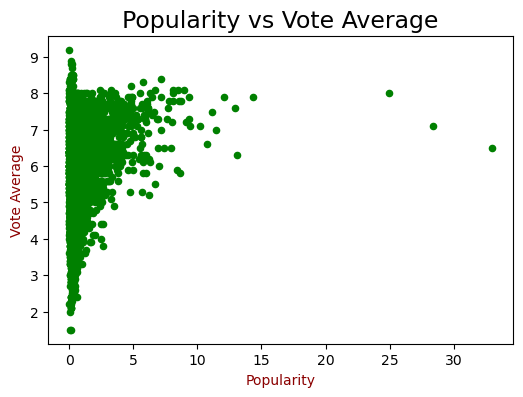

In [26]:
# scatter plot of popularity against vote average

df5 = df.plot.scatter(x='popularity',y='vote_average',c='green',figsize=(6,4))
df5.set_xlabel('Popularity', color='DarkRed')
df5.set_ylabel('Vote Average', color='DarkRed')
df5.set_title('Popularity vs Vote Average', fontsize = 17)

In [27]:
df.genres.value_counts()

genres
Drama                                      711
Comedy                                     707
Documentary                                306
Drama|Romance                              289
Comedy|Drama                               280
                                          ... 
Science Fiction|Horror|Action|Thriller       1
Action|Thriller|Science Fiction|Mystery      1
Comedy|Music|Romance|Foreign                 1
Documentary|Drama|Comedy                     1
Mystery|Science Fiction|Thriller|Drama       1
Name: count, Length: 2031, dtype: int64

#### Splits the values of genres '|' delimiter and converting into lists

In [28]:
split = ['genres']
for i in split:
    df[i] = df[i].apply(lambda x: x.split("|"))
df.head(3)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.68,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08


In [29]:
df = df.explode('genres')
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00


In [30]:
df7 = df.groupby('genres')['popularity'].sum().sort_values(ascending=True)
df7

genres
Foreign              35.24
TV Movie             44.03
Documentary          93.13
Western              97.42
History             192.35
War                 196.48
Music               198.15
Mystery             558.55
Animation           594.46
Horror              761.39
Fantasy             908.87
Family              967.06
Crime              1009.07
Romance            1013.21
Science Fiction    1230.41
Adventure          1697.11
Thriller           2155.90
Action             2208.08
Comedy             2246.25
Drama              2815.43
Name: popularity, dtype: float64

<Axes: ylabel='genres'>

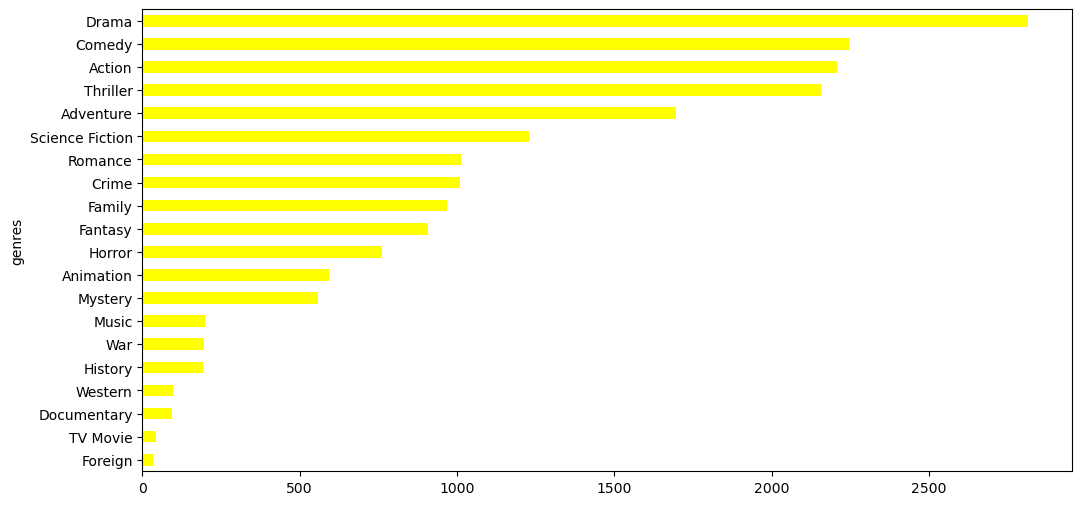

In [31]:
# hor bar plot depicting the popularity of each genre

df7.plot.barh(x='genres',y='popularity',color='yellow',figsize=(12,6))

In [32]:
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
profit                    int64
roi                     float64
original_title           object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
revenue_adj             float64
dtype: object

In [33]:
# converting release_date datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_11004\810435582.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


In [34]:
# checking dtypes
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
profit                           int64
roi                            float64
original_title                  object
director                        object
keywords                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
revenue_adj                    float64
dtype: object

In [35]:
df.head(1)

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09


In [36]:
#extracts the month component from release date
df['month'] = df['release_date'].dt.month

<Axes: xlabel='month'>

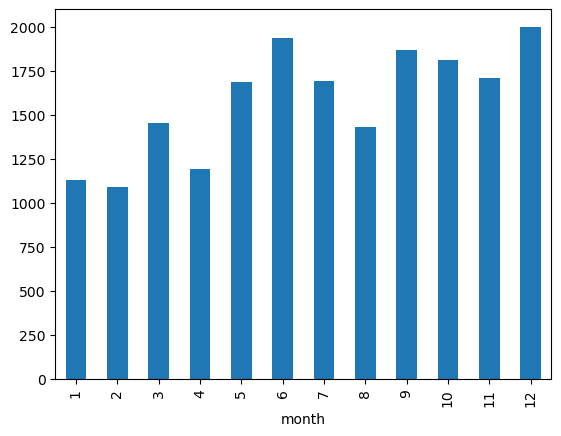

In [37]:
# plot bar graph of total popularity for each month

df8 = df.groupby('month')['popularity'].sum()
df8.plot(kind='bar')

In [38]:
df8.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='month')

#### Creating df8 from a dictionary data containing month & popularity from previous df8

In [39]:
data = {
    'month': df8.index,
    'popularity': df8.values
}
df8 = pd.DataFrame(data)

In [40]:
index_to_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

In [41]:
# maps the numerical month values in the month and update it

df8['month'] = df8['month'].map(index_to_month)
df

,popularity,budget,revenue,profit,roi,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj,month
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
0,32.99,150000000,1513528810,1363528810,9.09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09,6
1,28.42,150000000,378436354,228436354,1.52,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,3.481613e+08,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Mystery,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,1
10863,0.07,0,0,0,NaN,Beregis Avtomobilya,Eldar Ryazanov,car|trolley|stealing car,94,Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,1
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Action,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,11
10864,0.06,0,0,0,NaN,"What's Up, Tiger Lily?",Woody Allen,spoof,80,Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,11


<Axes: xlabel='month'>

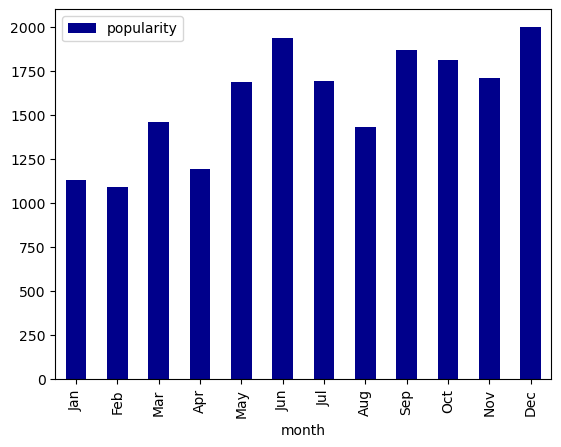

In [42]:
# Generate a bar plot with popularity and month

df8.plot(kind='bar', x='month', y='popularity', color='darkblue')

In [43]:
df9 = df.groupby('month')['revenue'].sum()
df9

month
1      35873456579
2      54352852344
3      93669046441
4      77813179749
5     151475532493
6     193681776686
7     141947570995
8      71642408883
9      70379641581
10     84054172048
11    139176268899
12    164738399960
Name: revenue, dtype: int64

In [44]:
data = {
    'month': df8.index,
    'revenue': df9.values
}
df9 = pd.DataFrame(data)

In [45]:
index_to_month = {
    0: 'Jan', 1: 'Feb', 2: 'Mar', 3: 'Apr', 4: 'May', 5: 'Jun',
    6: 'Jul', 7: 'Aug', 8: 'Sep', 9: 'Oct', 10: 'Nov', 11: 'Dec'
}

In [46]:
df9['month'] = df9['month'].map(index_to_month)

In [47]:
df9

,month,revenue
0,Jan,35873456579
1,Feb,54352852344
2,Mar,93669046441
3,Apr,77813179749
4,May,151475532493
5,Jun,193681776686
6,Jul,141947570995
7,Aug,71642408883
8,Sep,70379641581
9,Oct,84054172048


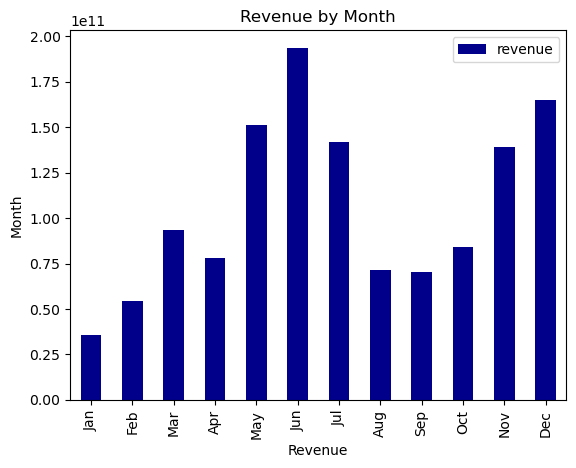

In [48]:
# generating bar plot with month and revenue

df9.plot(kind='bar', x='month', y='revenue', color='DarkBlue')
plt.title('Revenue by Month')
plt.xlabel('Revenue')
plt.ylabel('Month')
plt.show()

In [49]:
# Calculates total profit for each movie and selects the top 5

df10 = df.groupby('original_title')['profit'].sum().sort_values(ascending=False).head(5)
df10

original_title
Avatar                          10178023388
Star Wars: The Force Awakens     7472712900
Jurassic World                   5454115240
The Net                          5421398290
Titanic                          4896102564
Name: profit, dtype: int64

Text(0.5, 1.0, 'Top 5 Movies by Profit')

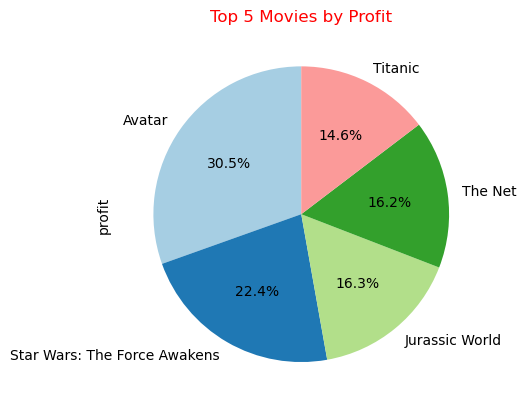

In [50]:
# generates a pie chart with top 5 movies profits distribution

df10.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors=plt.cm.Paired.colors)
plt.title("Top 5 Movies by Profit", color='red')

In [51]:
df11 = df.production_companies.value_counts().head(6)
df11

production_companies
0                       2152
Paramount Pictures       404
Universal Pictures       352
Walt Disney Pictures     236
Warner Bros.             225
Columbia Pictures        207
Name: count, dtype: int64

In [52]:
df11 = df11.drop(0)

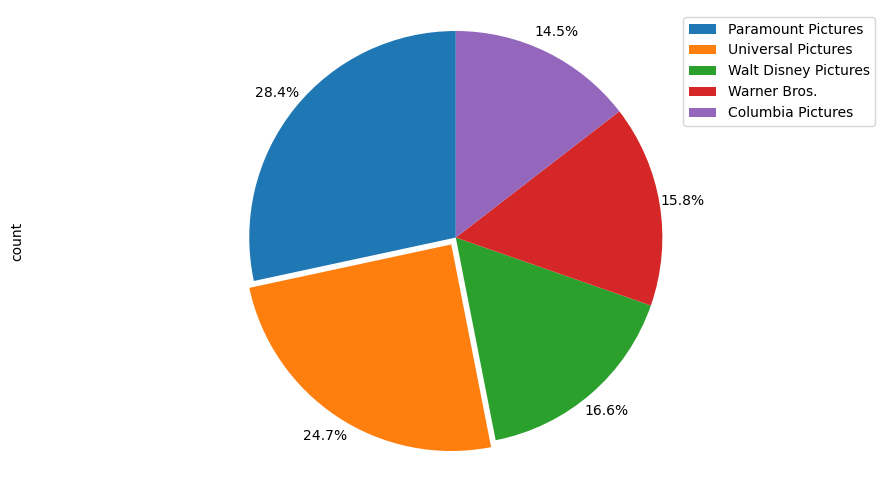

In [53]:
# Creates a pie chart for df11 production companies

explode_list = [0,0.04,0,0,0]
df11.plot(kind='pie',figsize=(11,6),autopct='%1.1f%%',startangle=90,labels=None,pctdistance=1.11,explode=explode_list)
plt.legend(labels=df11.index,loc='upper right')
plt.axis('equal')
plt.show()